# Hierarchical Clustering using Euclidean Distance  
## Pipeline to analyse Euclidean Distance using python

In [4]:
import os
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
# List all data files 
data_path = r'./data'
for file in os.listdir(data_path):
    print(file)

Corona_HCoV-NL63.txt
Corona_MN988668.txt
Corona_MT755827.txt
Corona_MT759582.txt
Corona_MT766907.txt
Corona_NC045512.txt
Dengue_MT862858.txt
Dengue_MT862893.txt
Enterovirus A_NC038306.txt
Enterovirus B_NC038307.txt
Enterovirus D_NC038308.txt
Enterovirus H_NC038309.txt
HIV_NC001802.txt
SARS_BJ01.txt
SARS_BJ02.txt
SARS_BJ03.txt
SARS_BJ04.txt
West Nile_NC009942.txt
Zika_AY632535.txt
Zika_MN101548.txt


##  2.3.  Calculate the Cumulative and Mean Skew Values.


In [6]:
# define 'bases_skew' function to calculate the skew values.
def bases_skew(A, B):
    try: return (A - B) / (A + B)
    except ZeroDivisionError: return 0

In [7]:
mat = np.array([])                # Cumulative skew values
mat2 = np.array([])               # Mean skew values
virus_names = list()

for file in os.listdir(data_path):
    input_file_path = data_path + '/' + file
    #print(input_file_path)
    counter = 0; A_count = 0; C_count = 0; G_count = 0; U_count = 0
    ca_skew = []; ga_skew = []; ua_skew = []; uc_skew = []; ug_skew = []; cg_skew = []  
    
    temp_DNA = ''           # One line of Template DNA Sequence
    with open(input_file_path,'r') as input_data:
        header = input_data.readline().strip()
        for line in input_data:
            temp_DNA = line.strip()
            for base in temp_DNA:
                counter += 1
                if base == "A":
                    U_count +=1                  
                elif base == "C":
                    G_count +=1
                elif base == "G":
                    C_count +=1
                elif base == "T":
                    A_count +=1        

                ca_skew.insert(counter, bases_skew(C_count, A_count))
                ga_skew.insert(counter, bases_skew(G_count, A_count))
                ua_skew.insert(counter, bases_skew(U_count, A_count))
                ug_skew.insert(counter, bases_skew(U_count, G_count))
                uc_skew.insert(counter, bases_skew(U_count, C_count))
                cg_skew.insert(counter, bases_skew(C_count, G_count))            

        #print('File name ', file)
        #print('Total bases: ', counter)
        #print('Cumulative ca_skew = ', np.cumsum(ca_skew)[len(ca_skew)-1])
        #print('Cumulative ga_skew = ',np.cumsum(ga_skew)[len(ga_skew)-1])
        #print('Cumulative ua_skew = ',np.cumsum(ua_skew)[len(ua_skew)-1])
        #print('Cumulative ug_skew = ',np.cumsum(ug_skew)[len(ug_skew)-1])
        #print('Cumulative uc_skew = ',np.cumsum(uc_skew)[len(uc_skew)-1])
        #print('Cumulative cg_skew = ',np.cumsum(cg_skew)[len(cg_skew)-1])
        #print('==============================================')
        #print('Mean ca_skew = ', statistics.mean(ca_skew))
        #print('Mean ga_skew = ', statistics.mean(ga_skew))
        #print('Mean ua_skew = ', statistics.mean(ua_skew))
        #print('Mean ug_skew = ', statistics.mean(ug_skew))
        #print('Mean uc_skew = ', statistics.mean(uc_skew))
        #print('Mean cg_skew = ', statistics.mean(cg_skew))
        
        # Get the virus name from the file name
        virus_Name = os.path.split(input_file_path)[1].split(".")[0]
        # Insert the virus name into the virus names list
        virus_names.append(virus_Name)
        c = 10
        if mat.shape == (0,):
            #print('The mat is empty, use hstack.')
            mat = np.hstack((mat, np.array([np.cumsum(ca_skew)[len(ca_skew)-1],
                                            np.cumsum(ga_skew)[len(ga_skew)-1],
                                            np.cumsum(ua_skew)[len(ua_skew)-1],
                                            np.cumsum(ug_skew)[len(ug_skew)-1],
                                            np.cumsum(uc_skew)[len(uc_skew)-1],
                                            np.cumsum(cg_skew)[len(cg_skew)-1]                                            
                                           ])))
            mat2 = np.hstack((mat2, np.array([(statistics.mean(ca_skew))*c,
                                            (statistics.mean(ga_skew))*c,
                                            (statistics.mean(ua_skew))*c,
                                            (statistics.mean(ug_skew))*c,
                                            (statistics.mean(uc_skew))*c,
                                            (statistics.mean(cg_skew))*c                                            
                                           ])))
        else:
            #print('The mat has at least one row, use vstack.')
            mat = np.vstack((mat, np.array([np.cumsum(ca_skew)[len(ca_skew)-1],
                                            np.cumsum(ga_skew)[len(ga_skew)-1],
                                            np.cumsum(ua_skew)[len(ua_skew)-1],
                                            np.cumsum(ug_skew)[len(ug_skew)-1],
                                            np.cumsum(uc_skew)[len(uc_skew)-1],
                                            np.cumsum(cg_skew)[len(cg_skew)-1]                                            
                                           ])))    
            mat2 = np.vstack((mat2, np.array([(statistics.mean(ca_skew))*c,
                                            (statistics.mean(ga_skew))*c,
                                            (statistics.mean(ua_skew))*c,
                                            (statistics.mean(ug_skew))*c,
                                            (statistics.mean(uc_skew))*c,
                                            (statistics.mean(cg_skew))*c                                            
                                           ])))    
        
        #plt.figure(figsize=(9,6))
        #plt.plot(np.cumsum(ca_skew), label="Cumulative CA Skew") 
        #plt.plot(np.cumsum(ga_skew), label="Cumulative GA Skew") 
        #plt.plot(np.cumsum(ua_skew), label="Cumulative UA Skew") 
        #plt.plot(np.cumsum(ug_skew), label="Cumulative UG Skew") 
        #plt.plot(np.cumsum(uc_skew), label="Cumulative UC Skew") 
        #plt.plot(np.cumsum(cg_skew), label="Cumulative CG Skew")      
        #plt.title(virus_Name + " Skew Profiles")
        #plt.legend()
        #plt.grid()
        ### You can use 'plt.savefig()' to save the plot, but that will slow down the code even more!
        ##plt.savefig(virus_Name + '.png', dpi=72, bbox_inches='tight')
        #plt.show()    
        #plt.close()
        input_data.close()

In [8]:
linkage(mat2)[0,]

array([1.       , 5.       , 0.0096476, 2.       ])

In [9]:
print(len(virus_names))
virus_names[:]

20


['Corona_HCoV-NL63',
 'Corona_MN988668',
 'Corona_MT755827',
 'Corona_MT759582',
 'Corona_MT766907',
 'Corona_NC045512',
 'Dengue_MT862858',
 'Dengue_MT862893',
 'Enterovirus A_NC038306',
 'Enterovirus B_NC038307',
 'Enterovirus D_NC038308',
 'Enterovirus H_NC038309',
 'HIV_NC001802',
 'SARS_BJ01',
 'SARS_BJ02',
 'SARS_BJ03',
 'SARS_BJ04',
 'West Nile_NC009942',
 'Zika_AY632535',
 'Zika_MN101548']

In [10]:
print('mat shape = ', mat.shape)
print('mat2 shape = ', mat2.shape)

mat shape =  (20, 6)
mat2 shape =  (20, 6)


In [11]:
print(mat[0,0])
print("{:.2f}".format(mat[0,0]))

-8892.718135634901
-8892.72


In [12]:
print(mat[0,])

[ -8892.71813563 -13454.3840888   -5947.28102079   8392.04623687
   3165.31804809   5417.58910545]


In [13]:
np.set_printoptions(linewidth=150)
print('0 ', mat[0,])
print('1 ', mat[1,])
print('2 ', mat[2,])
print('...', '...')
print('...', '...')
print('19 ', mat[19,])

0  [ -8892.71813563 -13454.3840888   -5947.28102079   8392.04623687   3165.31804809   5417.58910545]
1  [-6452.98699289 -8028.54945613  -918.9649018   7170.21888199  5574.67104164  1676.44382901]
2  [-6476.32615371 -8071.24025314  -928.13283219  7203.71647803  5588.47631333  1697.3942333 ]
... ...
... ...
19  [1352.1148887  -295.92443703 1152.42689342 1444.8624689  -202.88952768 1644.59149638]


In [14]:
print('0 ', mat2[0,])
print('1 ', mat2[1,])
print('2 ', mat2[2,])
print('...', '...')
print('...', '...')
print('19 ', mat2[19,])

0  [-3.22749542 -4.88309225 -2.15848765  3.04578312  1.14881067  1.96624292]
1  [-2.15956193 -2.68684095 -0.30754155  2.39959134  1.86562399  0.56104007]
2  [-2.16577807 -2.69914064 -0.31038118  2.40902802  1.86886811  0.56763343]
... ...
... ...
19  [ 1.2591869  -0.27558618  1.07322303  1.34556013 -0.18894536  1.53156221]


In [15]:
print(list(map('{:.1f}'.format, mat[0,])))
print(list(map('{:.1f}'.format, mat[1,])))
print(list(map('{:.1f}'.format, mat[2,])))
print(list(map('{:.1f}'.format, mat[3,])))

['-8892.7', '-13454.4', '-5947.3', '8392.0', '3165.3', '5417.6']
['-6453.0', '-8028.5', '-919.0', '7170.2', '5574.7', '1676.4']
['-6476.3', '-8071.2', '-928.1', '7203.7', '5588.5', '1697.4']
['-6392.6', '-8084.7', '-1013.4', '7133.5', '5420.5', '1795.3']


In [16]:
print(list(map('{:.3f}'.format, [i/10 for i in mat2[0,]])))
print(list(map('{:.3f}'.format, [i/10 for i in mat2[1,]])))
print(list(map('{:.3f}'.format, [i/10 for i in mat2[2,]])))
print('...', '...')
print('...', '...')
print(list(map('{:.3f}'.format, [i/10 for i in mat2[19,]])))

['-0.323', '-0.488', '-0.216', '0.305', '0.115', '0.197']
['-0.216', '-0.269', '-0.031', '0.240', '0.187', '0.056']
['-0.217', '-0.270', '-0.031', '0.241', '0.187', '0.057']
... ...
... ...
['0.126', '-0.028', '0.107', '0.135', '-0.019', '0.153']


In [17]:
df = pd.DataFrame(np.array([
        list(map('{:.2f}'.format, mat[0,])), list(map('{:.2f}'.format, mat[1,])),
        list(map('{:.2f}'.format, mat[2,])), list(map('{:.2f}'.format, mat[3,])),
        list(map('{:.2f}'.format, mat[4,])), list(map('{:.2f}'.format, mat[5,])),
        list(map('{:.2f}'.format, mat[6,])), list(map('{:.2f}'.format, mat[7,])),
        list(map('{:.2f}'.format, mat[8,])), list(map('{:.2f}'.format, mat[9,])),
        list(map('{:.2f}'.format, mat[10,])), list(map('{:.2f}'.format, mat[11,])),
        list(map('{:.2f}'.format, mat[12,])), list(map('{:.2f}'.format, mat[13,])),
        list(map('{:.2f}'.format, mat[14,])), list(map('{:.2f}'.format, mat[15,])),
        list(map('{:.2f}'.format, mat[16,])), list(map('{:.2f}'.format, mat[17,])),
        list(map('{:.2f}'.format, mat[18,])), list(map('{:.2f}'.format, mat[19,]))      
        ]),
        columns=['ca_skew', 'ga_skew', 'ua_skew','ug_skew', 'uc_skew', 'cg_skew'],
        index=virus_names[:])
df

,ca_skew,ga_skew,ua_skew,ug_skew,uc_skew,cg_skew
Corona_HCoV-NL63,-8892.72,-13454.38,-5947.28,8392.05,3165.32,5417.59
Corona_MN988668,-6452.99,-8028.55,-918.96,7170.22,5574.67,1676.44
Corona_MT755827,-6476.33,-8071.24,-928.13,7203.72,5588.48,1697.39
Corona_MT759582,-6392.58,-8084.69,-1013.36,7133.52,5420.50,1795.32
Corona_MT766907,-6347.71,-8089.15,-943.60,7206.93,5444.58,1846.75
Corona_NC045512,-6458.06,-8034.26,-902.06,7191.16,5595.44,1677.13
Dengue_MT862858,907.99,-114.88,1841.00,1955.26,952.23,1021.56
Dengue_MT862893,917.53,-124.85,1845.74,1969.50,947.53,1040.92
Enterovirus A_NC038306,7.85,188.96,270.06,80.26,260.78,-182.11
Enterovirus B_NC038307,134.34,201.25,596.30,395.27,461.43,-67.37


In [18]:
df2 = pd.DataFrame(np.array([
        list(map('{:.2f}'.format, [i/10 for i in mat2[0,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[1,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[2,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[3,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[4,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[5,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[6,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[7,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[8,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[9,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[10,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[11,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[12,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[13,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[14,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[15,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[16,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[17,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[18,]])), 
        list(map('{:.2f}'.format, [i/10 for i in mat2[19,]]))    
        ]),
        columns=['ca_skew', 'ga_skew', 'ua_skew','ug_skew', 'uc_skew', 'cg_skew'],
        index=virus_names[:])
df2

,ca_skew,ga_skew,ua_skew,ug_skew,uc_skew,cg_skew
Corona_HCoV-NL63,-0.32,-0.49,-0.22,0.30,0.11,0.20
Corona_MN988668,-0.22,-0.27,-0.03,0.24,0.19,0.06
Corona_MT755827,-0.22,-0.27,-0.03,0.24,0.19,0.06
Corona_MT759582,-0.21,-0.27,-0.03,0.24,0.18,0.06
Corona_MT766907,-0.21,-0.27,-0.03,0.24,0.18,0.06
Corona_NC045512,-0.22,-0.27,-0.03,0.24,0.19,0.06
Dengue_MT862858,0.09,-0.01,0.18,0.19,0.09,0.10
Dengue_MT862893,0.09,-0.01,0.18,0.19,0.09,0.10
Enterovirus A_NC038306,0.00,0.03,0.04,0.01,0.04,-0.02
Enterovirus B_NC038307,0.02,0.03,0.08,0.05,0.06,-0.01


> Wikipedia
>> In [Cartesian coordinates](https://en.wikipedia.org/wiki/Cartesian_coordinate_system) if $p = (p_1, p_2,\cdots, p_n)$ and $q = (q_1, q_2,\cdots, q_n)$ are two points in [Euclidean n-space](https://en.wikipedia.org/wiki/Euclidean_space), then the **Euclidean distance** (d) from **p** to **q**, or from **q** to **p**, is given by the [Pythagorean formula](https://en.wikipedia.org/wiki/Pythagorean_theorem):  
>>$d(p, q) = d(q, p)= \sqrt{\sum_{i=1}^n (q_i - p_i)^2}$  
>>$=\sqrt{(q_1-p_1)^2+(q_2-p_2)^2+\cdots+(q_n-p_n)^2}$  
  
  
$d(Zika AY632535, Zika MN101548)=
\sqrt{(1381.19-1352.11)^2+(-283.89-(-295.92))^2+(1147.27-1152.43)^2+
(1432.18-1444.86)^2+(-237.85-(-202.89))^2+(1663.35-1644.59)^2}\approx52.46$




>```python
import math  
dist = 0  
for p, q in zip(mat[18,], mat[19,]):        
    dist += math.pow((p-q), 2)  
dist = math.sqrt(dist)
print(dist)  
> 52.45662363913553  
>```
  
```python
from scipy.cluster.hierarchy import linkage
linkage(mat)
```

In [19]:
linkage_matrix = linkage(mat, 
                         method='single', 
                         metric='euclidean', 
                         optimal_ordering=False)
print(linkage_matrix.shape)
print(linkage_matrix[0:3])
print('...', '...')
print(linkage_matrix[18])

(19, 4)
[[ 6.          7.         28.5101875   2.        ]
 [ 1.          5.         34.84341166  2.        ]
 [18.         19.         52.45662364  2.        ]]
... ...
[   0.           37.         8900.47217989   20.        ]


In [20]:
y = 0
for x in range(len(linkage_matrix)):
    y+=1
    print(len(linkage_matrix)+y, linkage_matrix[x])

20 [ 6.         7.        28.5101875  2.       ]
21 [ 1.          5.         34.84341166  2.        ]
22 [18.         19.         52.45662364  2.        ]
23 [13.         16.         52.91056314  2.        ]
24 [ 2.        21.        54.7541342  3.       ]
25 [ 14.          15.         111.14546016   2.        ]
26 [ 23.          25.         111.45526329   4.        ]
27 [  3.           4.         124.55923965   2.        ]
28 [ 24.          27.         234.43283633   5.        ]
29 [ 17.          22.         496.71392088   3.        ]
30 [  8.           9.         524.63500631   2.        ]
31 [ 11.          30.         741.97419156   3.        ]
32 [  10.           31.         1143.03514609    4.        ]
33 [  12.           20.         1372.62989182    3.        ]
34 [  29.           33.         1631.54140784    6.        ]
35 [  32.           34.         2201.42550557   10.        ]
36 [  26.           28.         3885.69989123    9.        ]
37 [  35.          36.        8047.9124

In [21]:
df.iloc[[2, 1,5], :]

,ca_skew,ga_skew,ua_skew,ug_skew,uc_skew,cg_skew
Corona_MT755827,-6476.33,-8071.24,-928.13,7203.72,5588.48,1697.39
Corona_MN988668,-6452.99,-8028.55,-918.96,7170.22,5574.67,1676.44
Corona_NC045512,-6458.06,-8034.26,-902.06,7191.16,5595.44,1677.13


In [22]:
linkage_matrix = linkage(mat, 
                         method='single', 
                         metric='euclidean', 
                         optimal_ordering=True)
print(linkage_matrix.shape)
for x in range(len(linkage_matrix)):
    print(linkage_matrix[x])

(19, 4)
[ 6.         7.        28.5101875  2.       ]
[ 5.          1.         34.84341166  2.        ]
[18.         19.         52.45662364  2.        ]
[16.         13.         52.91056314  2.        ]
[ 2.        21.        54.7541342  3.       ]
[ 14.          15.         111.14546016   2.        ]
[ 25.          23.         111.45526329   4.        ]
[  3.           4.         124.55923965   2.        ]
[ 24.          27.         234.43283633   5.        ]
[ 17.          22.         496.71392088   3.        ]
[  9.           8.         524.63500631   2.        ]
[ 11.          30.         741.97419156   3.        ]
[  10.           31.         1143.03514609    4.        ]
[  20.           12.         1372.62989182    3.        ]
[  29.           33.         1631.54140784    6.        ]
[  32.           34.         2201.42550557   10.        ]
[  28.           26.         3885.69989123    9.        ]
[  36.          35.        8047.9124615   19.       ]
[   0.           37.        

## 5.2: Clustring Methods

```Python
methods = ('single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward')
```

- **single** $^a$  
  - $d(u,v) = min(dist(u[i], v[j])$  
   - [Nearest Point Algorithm](https://en.wikipedia.org/wiki/Nearest_neighbor_search)  
  
- **complete** $^a$  
  - $d(u,v) = max(dist(u[i], v[j])$  
   - [Complete-linkage clustering](https://en.wikipedia.org/wiki/Complete-linkage_clustering) known also as Farthest Point Algorithm or Voor Hees Algorithm  
  
  **average** $^b$  
   - $d(u,v) = \sum_{ij}\frac{d(u[i], v[j])}{(|u| * |v|)}$  
    - [UPGMA](https://en.wikipedia.org/wiki/UPGMA) **U**nweighted **P**air **G**roup **M**ethod with **A**rithmetic Mean algorithm.   
  
- **weighted** $^c$    
  - $d(u,v) = \frac{dist(s,v) + dist(t,v)}{2}$  
   - [WPGMA](https://en.wikipedia.org/wiki/WPGMA) (**W**eighted **P**air **G**roup **M**ethod with **A**rithmetic Mean)
  
- **centroid** $^d$ 
  - $dist(s,t) = ||c_s - c_t||2$ 
   - [UPGMC](https://en.wikipedia.org/wiki/Hierarchical_clustering) (**U**nweighted **P**air **G**roup **M**ethod with **C**entroid linkage)
- **median**  
  - $d{(i\cup j),k} = \frac{d_{i,k} + d_{j,k}}{2}$ 
   - [WPGMC]() (**W**eighted **P**air **G**roup **M**ethod with **C**entroid linkage)
- **ward** $^e$  
  - $d(u,v) = \sqrt{\frac{|v| + |s|}{T}d(v,s)^2 + \frac{|v| + |t|}{T}d(v,t)^2 - \frac{|v|}{T}d(s,t)^2}$ 
   - [Ward's minimum variance method](https://en.wikipedia.org/wiki/Ward%27s_method)
   
   
   
$^a)$ $d(u,v)$ Euclidean distanc between $u$ and $v$ clusters.  

$^a)$ $u[i], v[j]$  all points $i$ in cluster $u$ and $j$ in cluster $v$.  

$^b)$ $|u|$ and $|v|$ are the cardinalities of clusters $u$ and $v$ respectiely.

$^c)$ $u, s, v, t$ where cluster $u$ was formed with cluster $s$ and $t$ and $v$ is a remaining cluster in the forest 

$^d)$ $c_s$ and $c_t$ The centroids of clusters $s$ and $t$.
  
$^e)$ $T = |v| + |s| + |t|$  

[Centroid](https://en.wikipedia.org/wiki/Centroid) or geometric center.


| | Arithmetic Mean | Geometric Center |
| :---- | :-------- |:-------- |  
| **Unweighted Pair Group** | average | centroid |
| **Weighted Pair Group**  | weighted | median |


In [23]:
df.iloc[[6,7,18,19], :]

,ca_skew,ga_skew,ua_skew,ug_skew,uc_skew,cg_skew
Dengue_MT862858,907.99,-114.88,1841.00,1955.26,952.23,1021.56
Dengue_MT862893,917.53,-124.85,1845.74,1969.50,947.53,1040.92
Zika_AY632535,1381.19,-283.89,1147.27,1432.18,-237.85,1663.35
Zika_MN101548,1352.11,-295.92,1152.43,1444.86,-202.89,1644.59


In [24]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(linkage_matrix, pdist(mat, metric='euclidean'))
c

0.9134217812884088

In [25]:
#coph_dists
#pdist(mat, metric='euclidean')

In [26]:
import operator
cophenetic_results = {}
methods = ('single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward')
for m in methods:    
    linkage_matrix = linkage(mat, method = m, metric='euclidean', optimal_ordering=True)
    #for x in range(len(linkage_matrix)):
    #    print(linkage_matrix[x])
    c, coph_dists = cophenet(linkage_matrix, pdist(mat))
    cophenetic_results[m] = c
    #print(c)
    #print('======================================================')
print(max(cophenetic_results.items(), key=operator.itemgetter(1))[0])
print(cophenetic_results)

single
{'single': 0.9134217812884088, 'complete': 0.9019088064307287, 'average': 0.9107636361802532, 'weighted': 0.9077800575926043, 'centroid': 0.9106318070979335, 'median': 0.907864065075456, 'ward': 0.8872728478312205}


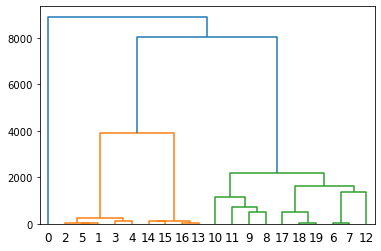

In [27]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=True)
dendrogram(linkage_matrix)
plt.show()
plt.close()

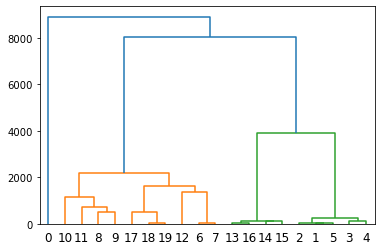

In [28]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=False)
dendrogram(linkage_matrix)
plt.show()
plt.close()

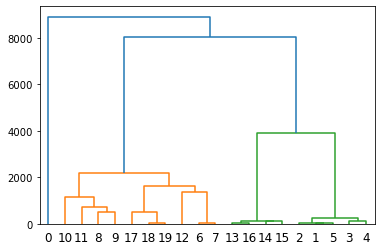

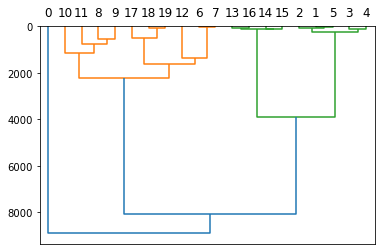

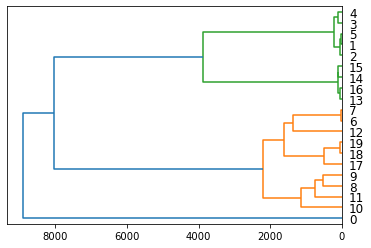

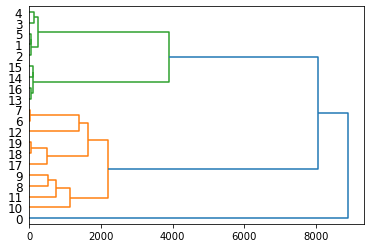

In [29]:
orientations = ('top', 'bottom', 'left', 'right')
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=False)
for orien in orientations:
    dendrogram(linkage_matrix, orientation = orien)
    plt.show()
    plt.close()

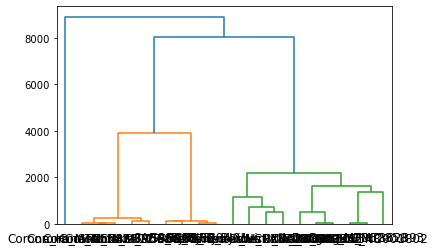

In [30]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=True)
dendrogram(linkage_matrix, labels=virus_names[:])
plt.show()
plt.close()

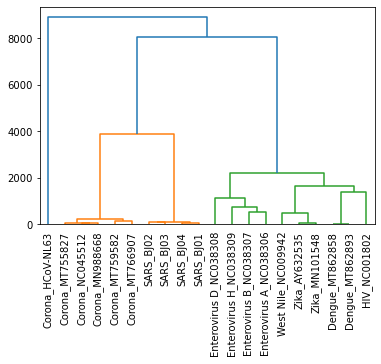

In [31]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=True)
dendrogram(linkage_matrix, labels=virus_names[:], leaf_rotation=90, leaf_font_size=10)
plt.show()
plt.close()

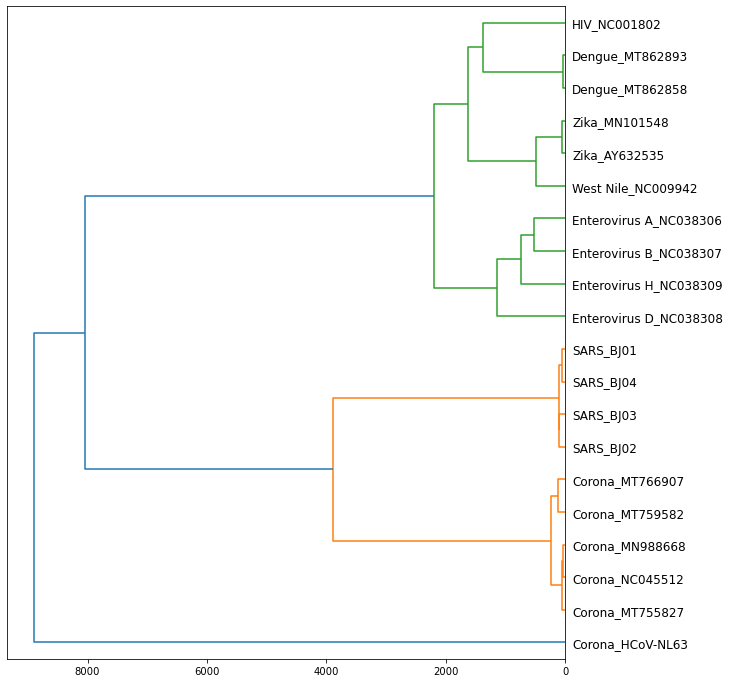

In [32]:
plt.figure(figsize=(10, 12))
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=6230)
plt.show()    
plt.close()

In [33]:
linkage_matrix[:,2]

array([  28.5101875 ,   34.84341166,   52.45662364,   52.91056314,   54.7541342 ,  111.14546016,  111.45526329,  124.55923965,  234.43283633,
        496.71392088,  524.63500631,  741.97419156, 1143.03514609, 1372.62989182, 1631.54140784, 2201.42550557, 3885.69989123, 8047.9124615 ,
       8900.47217989])

In [34]:
0.7*max(linkage_matrix[:,2])

6230.330525922286

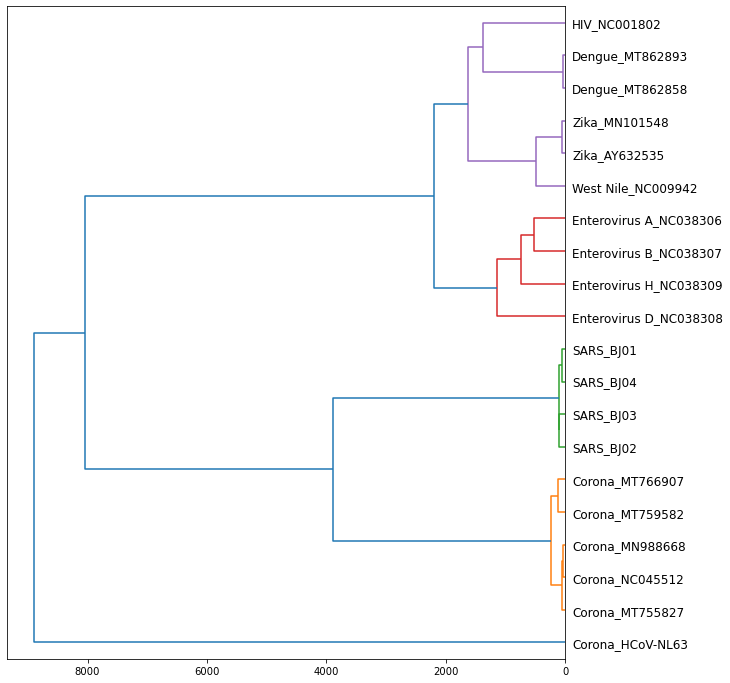

In [35]:
plt.figure(figsize=(10, 12))
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
plt.show()    
plt.close()

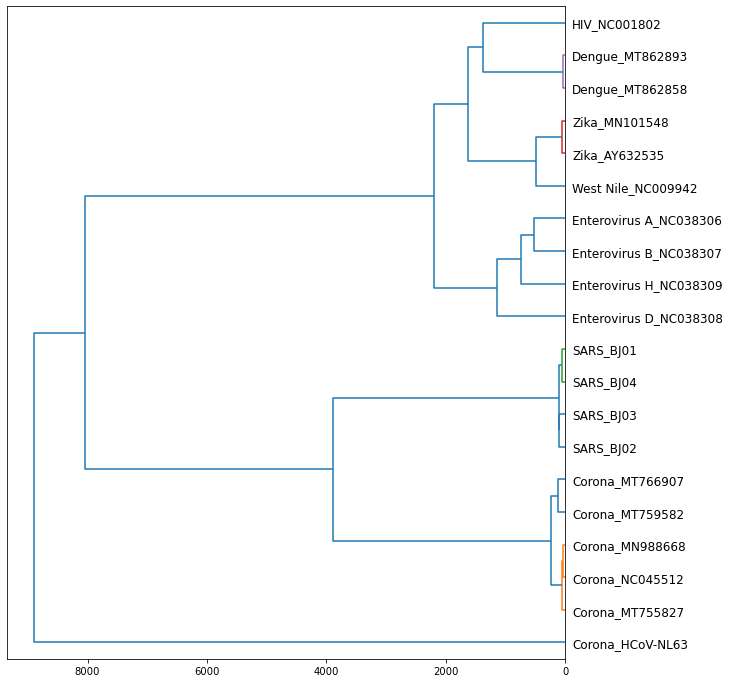

In [36]:
plt.figure(figsize=(10, 12))
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=2.2*min(linkage_matrix[:,2]))
plt.show()    
plt.close()

**Line style and color options**  
```python
linestyles = ('solid', 'dashed', 'dashdot', 'dotted')
colors_abbreviation = ('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w')
colors_names = ('blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan')
colors_hexa = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf')
```
*You can read more about matplotlib colors in the [documentation](https://matplotlib.org/api/colors_api.html#matplotlib.colors.Colormap).*

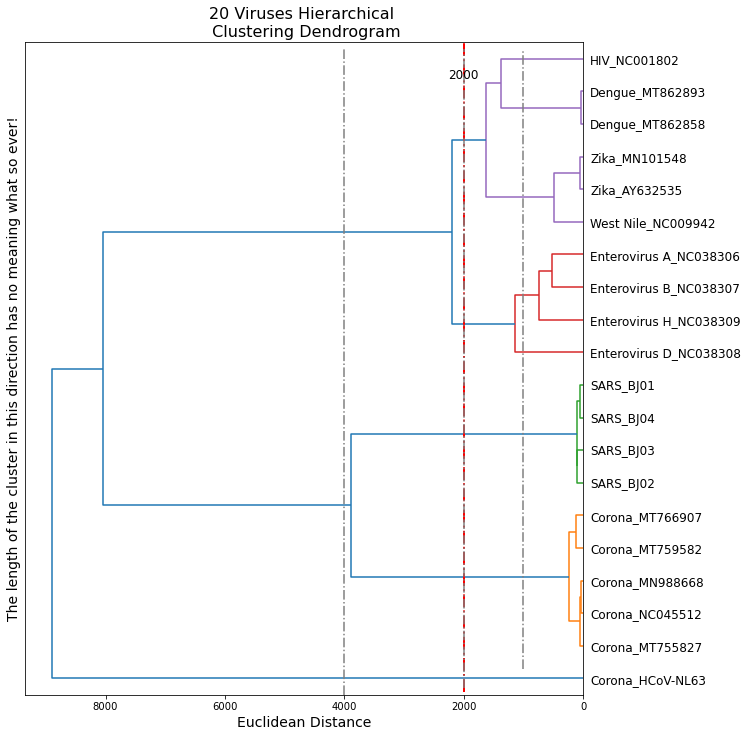

In [37]:
plt.figure(figsize=(10, 12))
plt.title('20 Viruses Hierarchical \n Clustering Dendrogram', fontsize=16)
plt.xlabel('Euclidean Distance', fontsize=14)
plt.ylabel('The length of the cluster in this direction has no meaning what so ever!', fontsize=14)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
plt.vlines(x=2000, ymin=1.0, ymax=200., linestyles='dashdot', color='r', lw=2)
plt.vlines(x=[4000,2000, 1000], ymin=[0, 2, 8], ymax=198., linestyles='dashdot', color='#7f7f7f')
#plt.hlines(y=2000, xmin=1.0, xmax=200., linestyles='dashdot', color='r')
#plt.hlines(y=[4000,2000, 1000], xmin=[0, 2, 8], xmax=198., linestyles='dashdot', label='Multiple Lines', color='#7f7f7f')
plt.text(2000, 190, '2000', size=12, ha='center', va='center')
plt.show()    
plt.close()

 - Riboviria  
     - Coronaviridae family,  
      - Corona 
      - SARS  
     - Flaviviridae family,  
        - Dengue 
        - Zika 
        - West Nile  
     - Picornaviridae  
        - Enterovirus  
     - Retroviridae  
        - HIV  
| | Virus Count | Strain Count |
| :---- | :--------: |:--------: |  
| *Coronaviridae* | **2** | **10** |
| *Flaviviridae*  | **3** | **5** |
| *Picornaviridae* | **1** | **5** |
| *Retroviridae*  | **1** | **1** |
|  |
| **Total**  | **7** | **20** |


In [38]:
print(cophenetic_results)

{'single': 0.9134217812884088, 'complete': 0.9019088064307287, 'average': 0.9107636361802532, 'weighted': 0.9077800575926043, 'centroid': 0.9106318070979335, 'median': 0.907864065075456, 'ward': 0.8872728478312205}


In [39]:
print("{:.3f}".format(cophenetic_results['single'] - cophenetic_results['ward']))

0.026


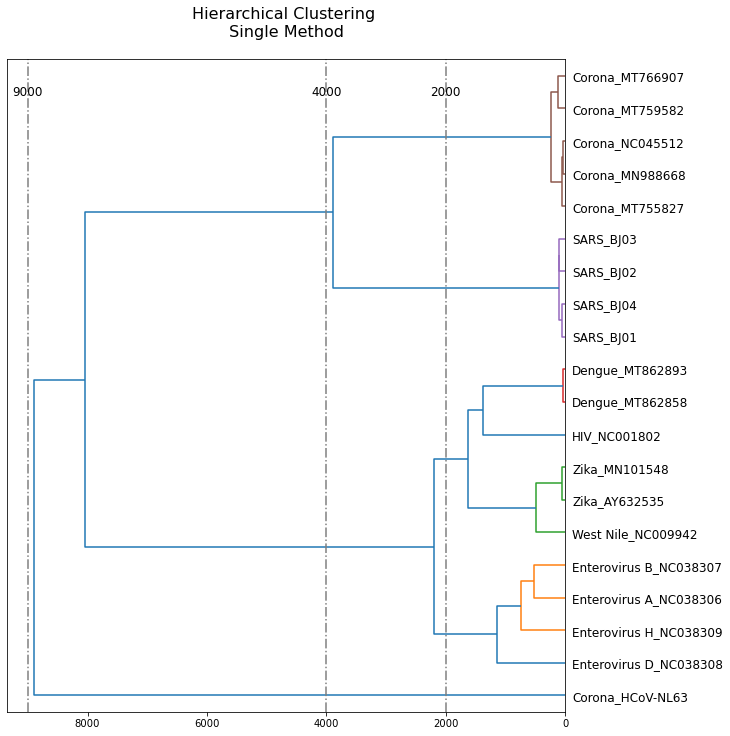

In [40]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Single Method \n', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.vlines(x=[2000, 4000, 9000], ymin=[0, 0, 0], ymax=200., linestyles='dashdot', color='#7f7f7f')
plt.text(2000, 190, '2000', size=12, ha='center', va='center')
plt.text(4000, 190, '4000', size=12, ha='center', va='center')
plt.text(9000, 190, '9000', size=12, ha='center', va='center')
plt.show()    

In [41]:
df.iloc[[6,7,12],:]

,ca_skew,ga_skew,ua_skew,ug_skew,uc_skew,cg_skew
Dengue_MT862858,907.99,-114.88,1841.00,1955.26,952.23,1021.56
Dengue_MT862893,917.53,-124.85,1845.74,1969.50,947.53,1040.92
HIV_NC001802,662.92,-648.06,2278.82,2865.17,1644.05,1306.64


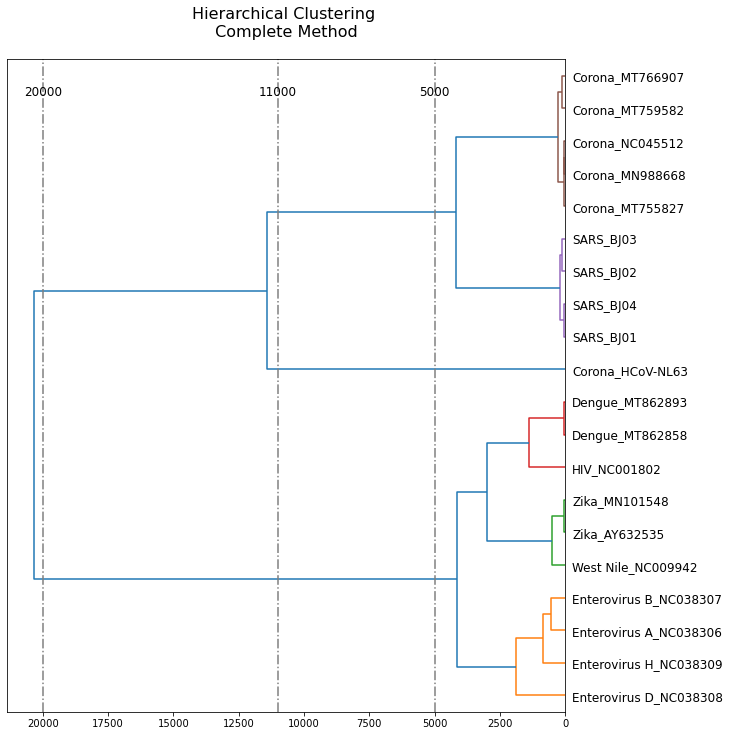

In [42]:
linkage_matrix = linkage(mat, method = 'complete', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Complete Method \n', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.vlines(x=[5000, 11000, 20000], ymin=[0, 0, 0], ymax=200., linestyles='dashdot', color='#7f7f7f')
plt.text(5000, 190, '5000', size=12, ha='center', va='center')
plt.text(11000, 190, '11000', size=12, ha='center', va='center')
plt.text(20000, 190, '20000', size=12, ha='center', va='center')

plt.show()    

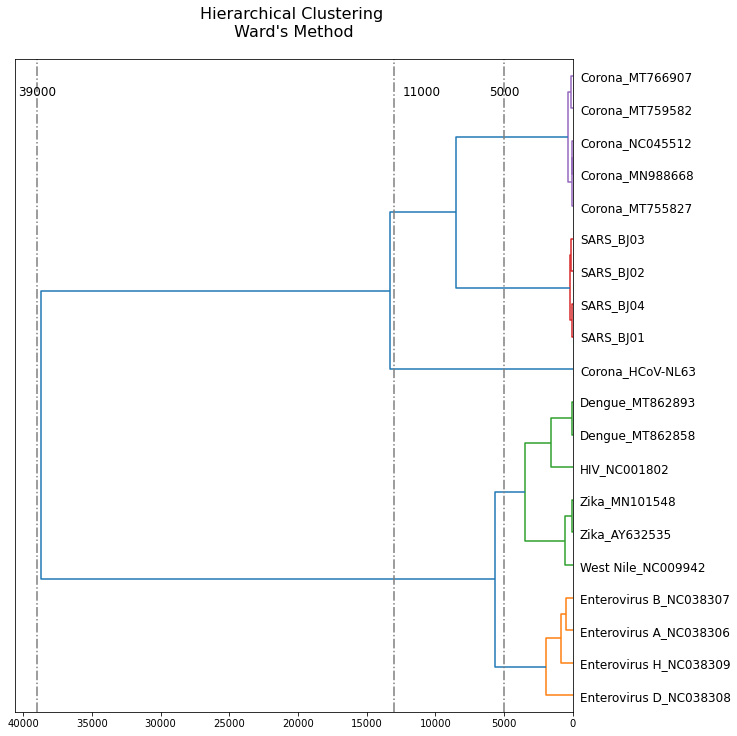

In [43]:
linkage_matrix = linkage(mat, method = 'ward', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Ward\'s Method \n', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.vlines(x=[5000, 13000, 39000], ymin=[0, 0, 0], ymax=200., linestyles='dashdot', color='#7f7f7f')
plt.text(5000, 190, '5000', size=12, ha='center', va='center')
plt.text(11000, 190, '11000', size=12, ha='center', va='center')
plt.text(39000, 190, '39000', size=12, ha='center', va='center')

plt.show()    

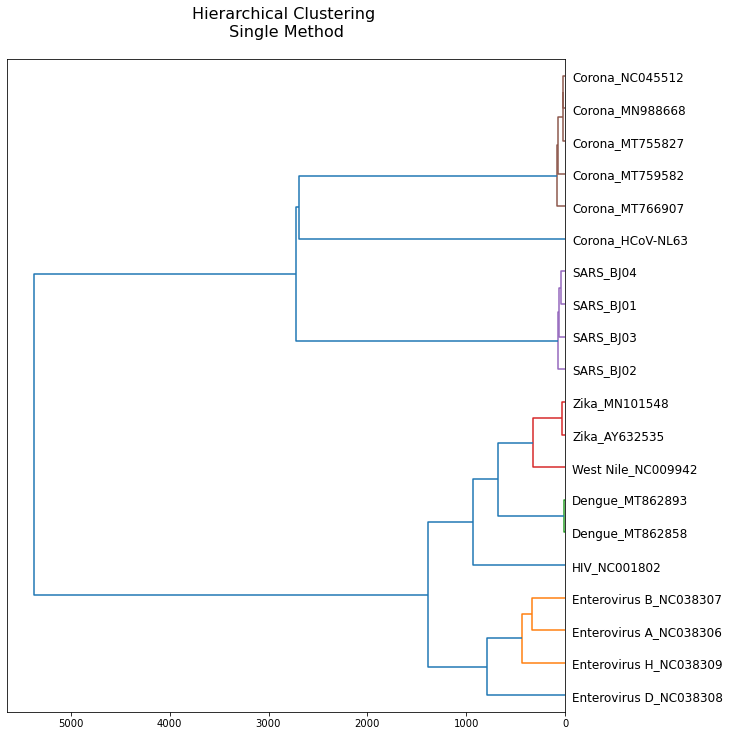

In [44]:
linkage_matrix = linkage(mat[:,[0,3]], method = 'single', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Single Method \n ', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.show()    

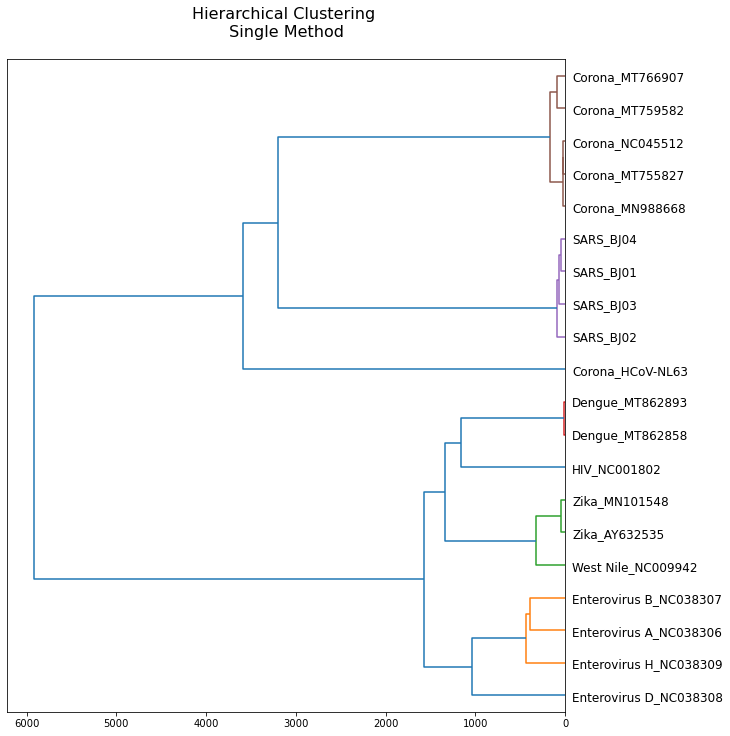

In [45]:
linkage_matrix = linkage(mat[:,[0,3,4]], method = 'single', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Single Method \n ', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.show()    

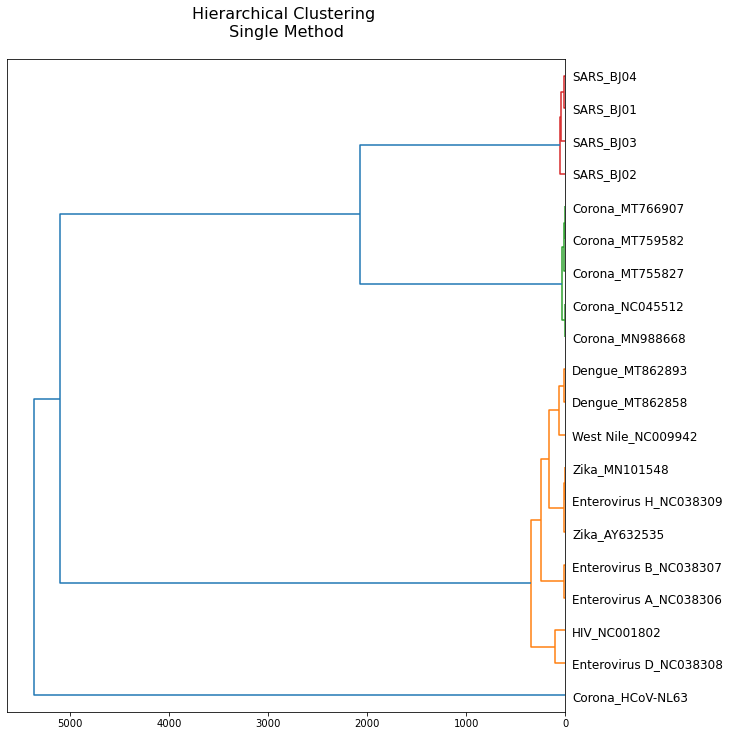

In [46]:
linkage_matrix = linkage(mat[:,[1]], method = 'single', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Single Method \n ', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.show()    

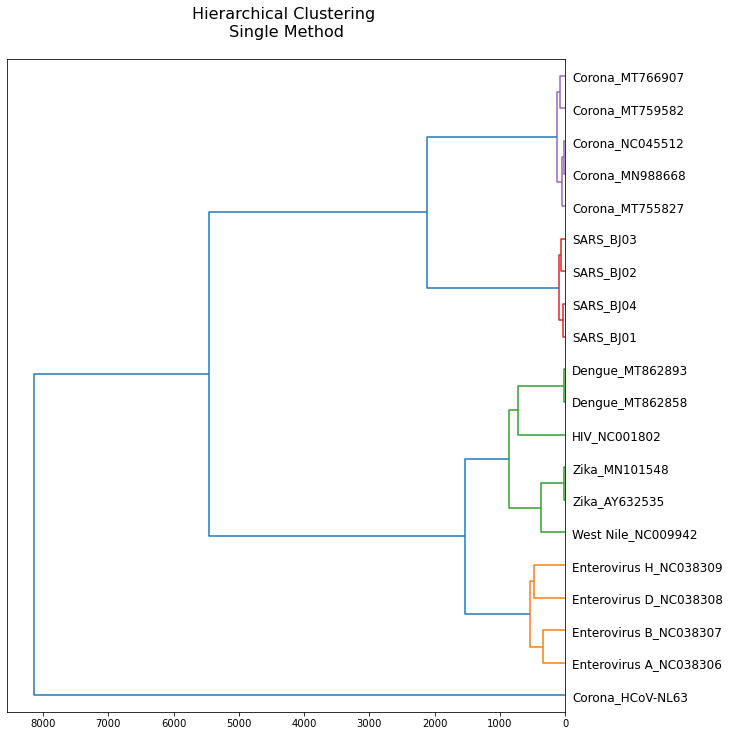

In [47]:
linkage_matrix = linkage(mat[:,[1,2,5]], method = 'single', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Single Method \n ', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.show()    

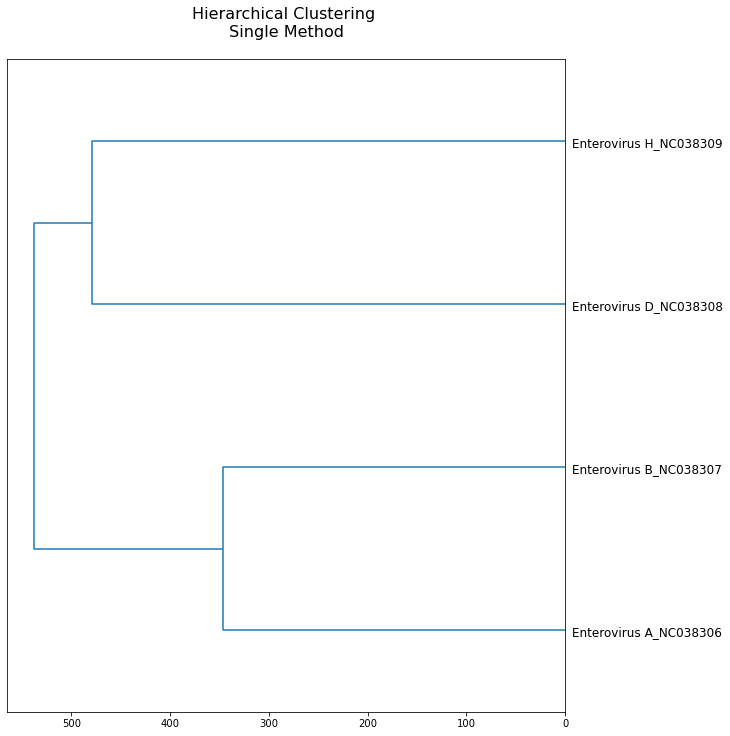

In [48]:
linkage_matrix = linkage(mat[8:12,[1,2,5]], method = 'single', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Single Method \n ', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[8:12], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.show()    

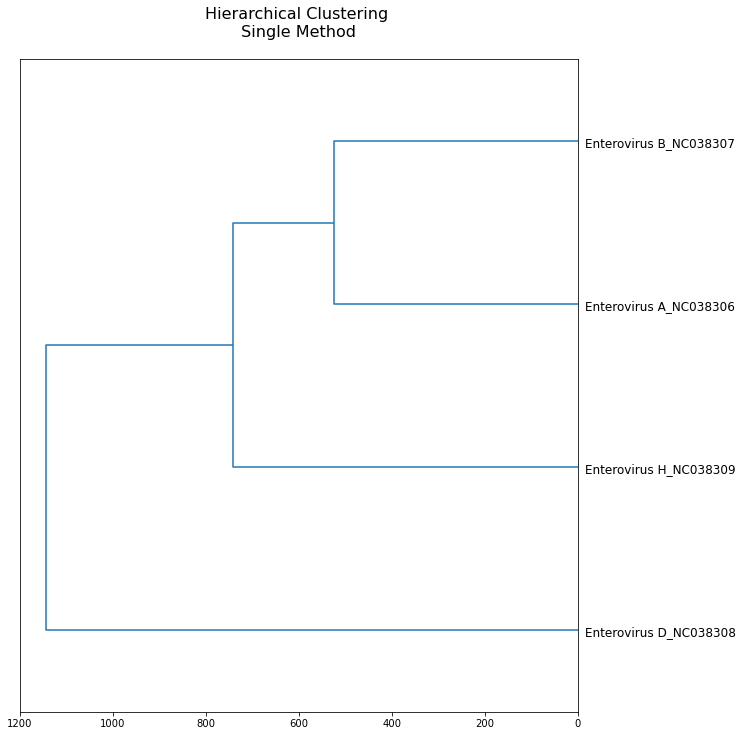

In [49]:
linkage_matrix = linkage(mat[8:12,], method = 'single', metric='euclidean', optimal_ordering=False)
plt.figure(figsize=(10, 12))
plt.title('Hierarchical Clustering \n Single Method \n ', fontsize=16)
dendrogram(linkage_matrix, labels=virus_names[8:12], orientation="left", color_threshold=0.12*max(linkage_matrix[:,2]))
plt.show()    

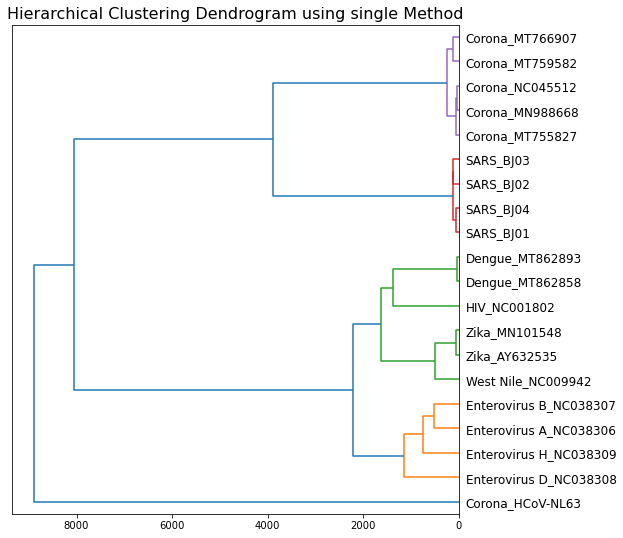

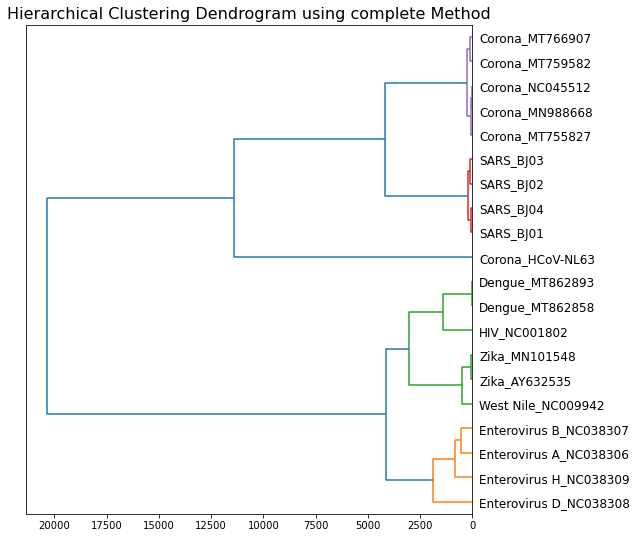

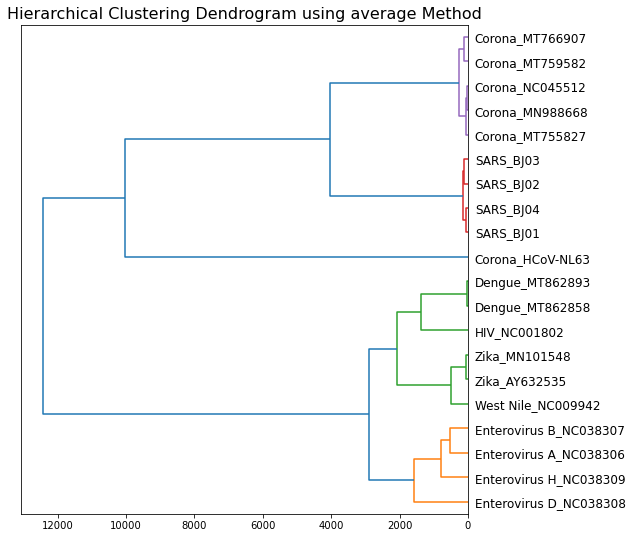

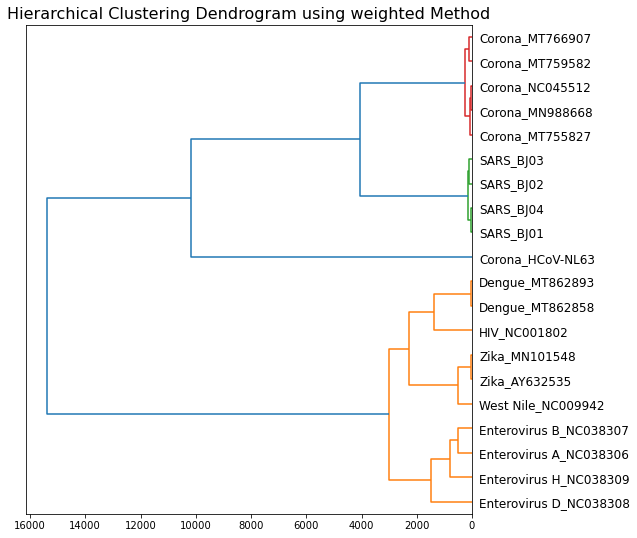

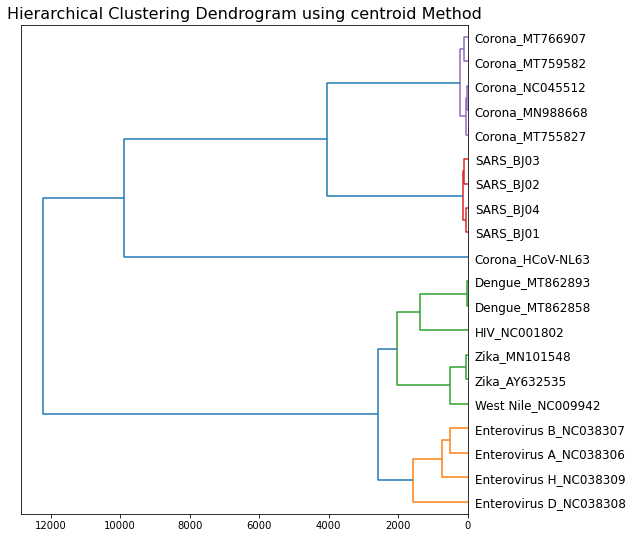

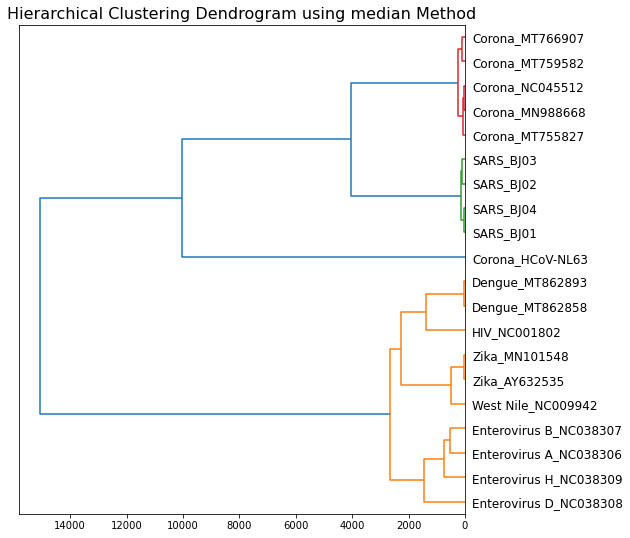

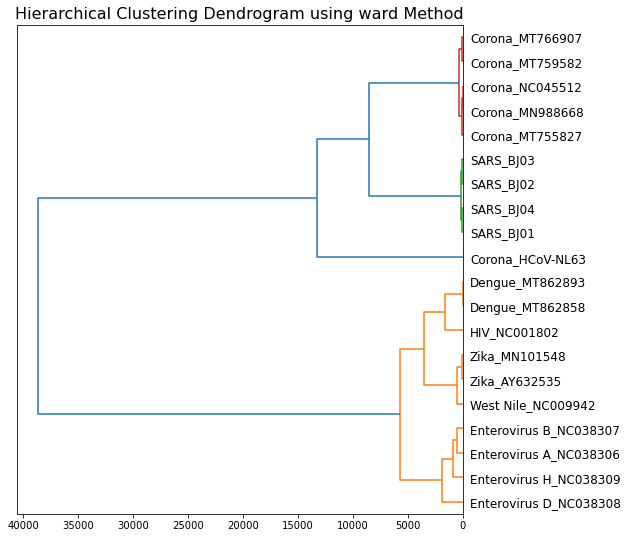

In [50]:
methods = ('single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward')
for m in methods:    
    linkage_matrix = linkage(mat, method = m, metric='euclidean', optimal_ordering=False)
    y = 0
    plt.figure(figsize=(8, 9))
    plt.title('Hierarchical Clustering Dendrogram using ' + str(m) + ' Method', fontsize=16)
    dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
    plt.show()   

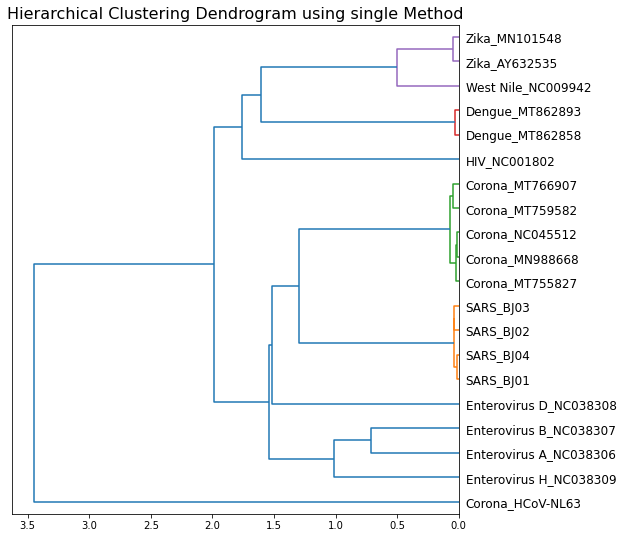

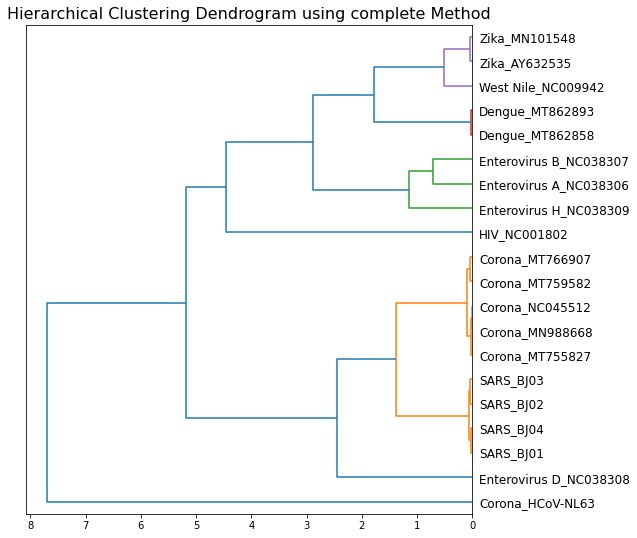

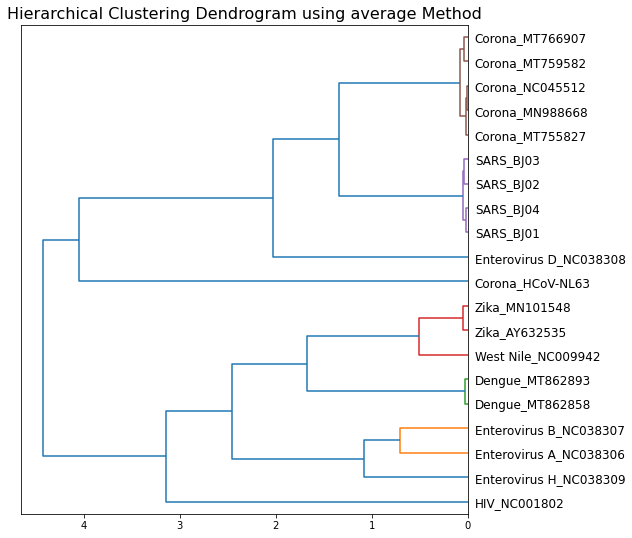

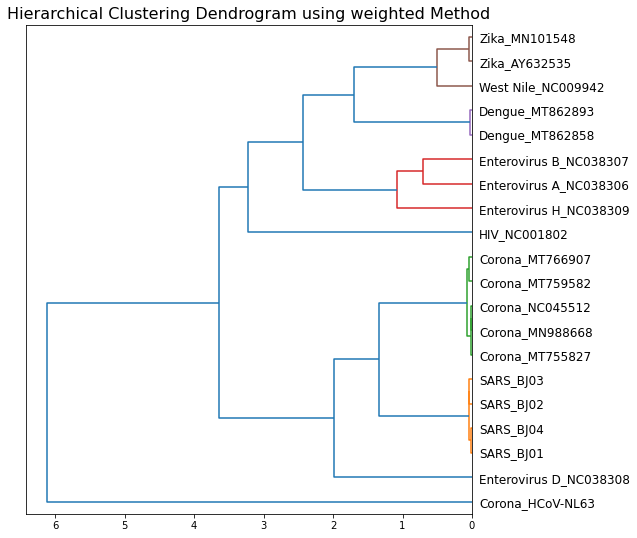

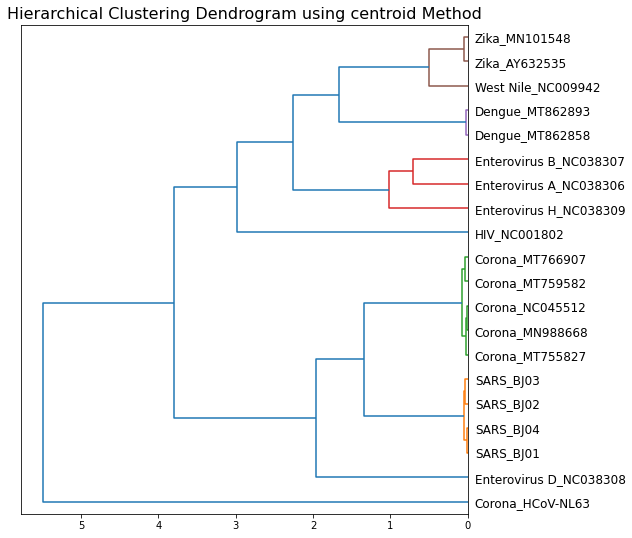

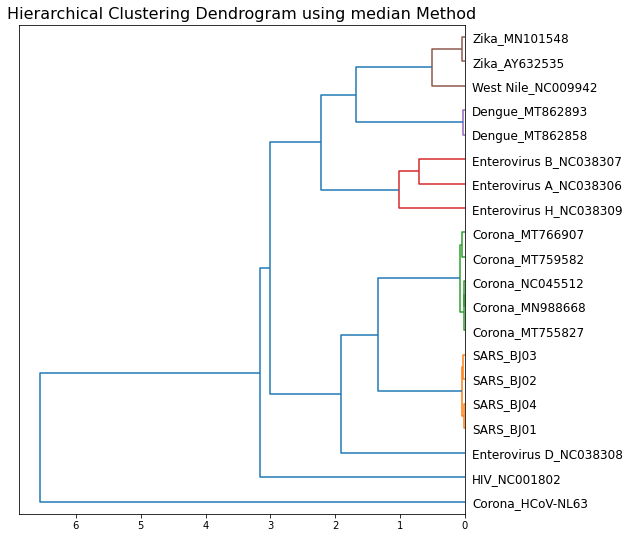

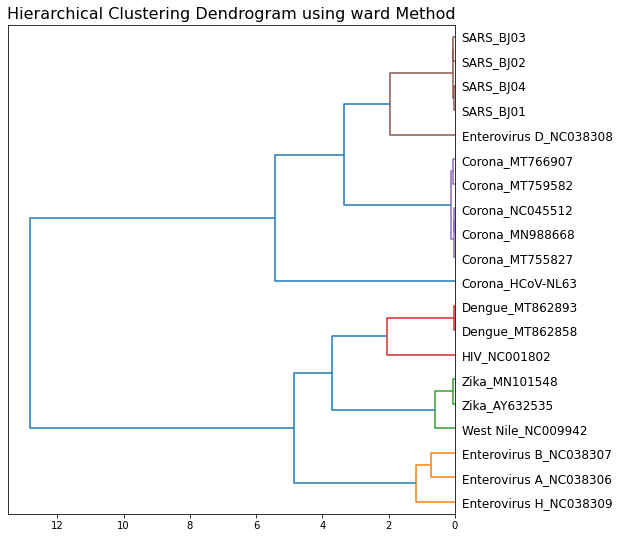

In [51]:
methods = ('single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward')
for m in methods:    
    linkage_matrix = linkage(mat2, method = m, metric='euclidean', optimal_ordering=False)
    y = 0
    plt.figure(figsize=(8, 9))
    plt.title('Hierarchical Clustering Dendrogram using ' + str(m) + ' Method', fontsize=16)
    dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
    plt.show()    

<table><tr><td><img src='images/dendogram_H.png'></td><td><img src='images/dendogram.png'></td></tr></table>  